In [8]:
DATASET_NAME = 'severity-classification'

# Add root to path
import sys
current_path = sys.path[0]
root_name = 'data-lifecycle'
root_path = current_path[:sys.path[0].find(root_name) + len(root_name)]
if root_path not in sys.path:
    sys.path.insert(0, root_path)

In [9]:
from datasets import DatasetDict
from common.directories import DATASET_DIR
import matplotlib.pyplot as plt
import pandas as pd
from plotter import Plotter

plotter = Plotter(DATASET_NAME)

In [10]:
df_train = DatasetDict.load_from_disk(DATASET_DIR / DATASET_NAME)['train'].to_pandas()
df_test = DatasetDict.load_from_disk(DATASET_DIR / DATASET_NAME)['test'].to_pandas()

# concatenate train and test
df = pd.concat([df_train, df_test])

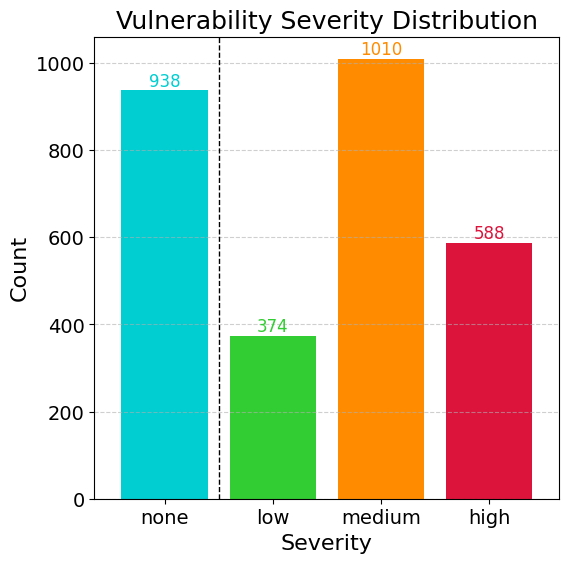

In [24]:
severity_counts = df['severity'].value_counts()
order = ['none', 'low', 'medium', 'high']
colors = ['darkturquoise', 'limegreen', 'darkorange', 'crimson']
severity_counts = severity_counts.reindex(order)

# Plotting
plt.figure(figsize=(6, 6))
bars = severity_counts.plot(kind='bar', color=colors, width=0.8)
plt.title('Vulnerability Severity Distribution')
plt.xlabel('Severity')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotates the labels on the x-axis so they show horizontally
plt.grid(axis='y', linestyle='--', alpha=0.6)

x_value = bars.patches[0].get_x() + bars.patches[0].get_width() + 0.1
plt.axvline(x=x_value, color='black', linestyle='--', linewidth=1)

# Annotating each bar with its count
for bar, color in zip(bars.patches, colors):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{int(bar.get_height())}',
             ha='center', va='bottom', color=color, fontsize=12)

plotter.save_plot('severity_distribution.png')

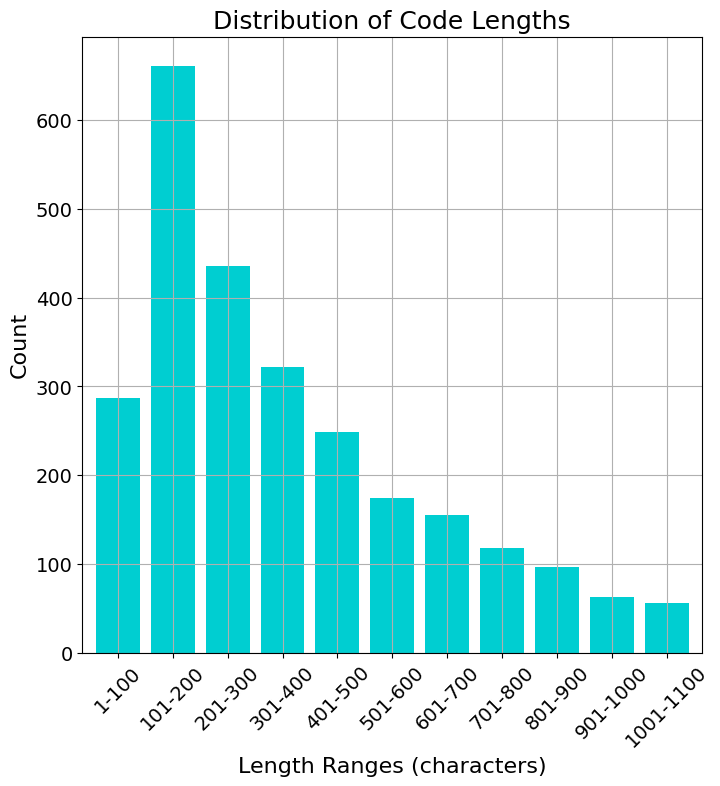

In [12]:
df['length'] = df['function'].apply(len)

# Step 2: Define the buckets for lengths
bins = list(range(1, 1201, 100))

# Step 3: Use pd.cut to categorize these lengths into the defined buckets
df['length_category'] = pd.cut(df['length'], bins=bins, right=False, labels=[f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins)-1)])

# Count the occurrences in each bucket
length_distribution = df['length_category'].value_counts().sort_index()

# Step 4: Plotting
plt.figure(figsize=(8, 8))
length_distribution.plot(kind='bar', color='darkturquoise', width=0.8)
plt.title('Distribution of Code Lengths')
plt.xlabel('Length Ranges (characters)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plotter.save_plot("length-distribution")

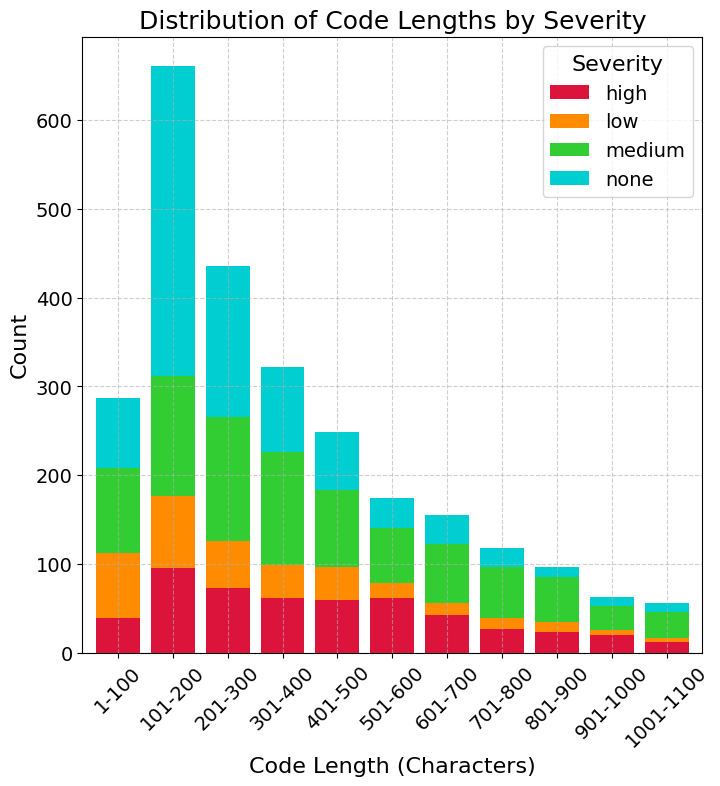

In [15]:
bins = range(0, 1101, 100)
labels = [f"{i}-{i+99}" for i in bins[:-1]]

data = pd.DataFrame({
    'function': df['function'],
    'severity': df['severity'],
    'code_length': df['function'].apply(len)
})

data['length_category'] = pd.cut(data['code_length'], bins=bins, labels=labels, right=False)

# Create a pivot table with counts of each severity per length category
pivot_df = df.pivot_table(index='length_category', columns='severity', aggfunc='size', fill_value=0)

order = ['none', 'low', 'medium', 'high']
colors = list(reversed(['darkturquoise', 'limegreen', 'darkorange', 'crimson']))
# Plotting a stacked bar chart
pivot_df.plot(kind='bar', stacked=True, figsize=(8, 8), color=colors, width=0.8)
plt.title('Distribution of Code Lengths by Severity')
plt.xlabel('Code Length (Characters)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Severity')
plt.grid(linestyle='--', alpha=0.6)

plotter.save_plot("length-severity-distribution")
